# FACES COMPRESSION WITH PCA

In [32]:
# Wczytywanie pakietów
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from skimage.io import imshow

In [13]:
df=fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\huber\scikit_learn_data


In [14]:
faces, _ = fetch_olivetti_faces(return_X_y=True, shuffle=True)

In [15]:
faces.shape

(400, 4096)

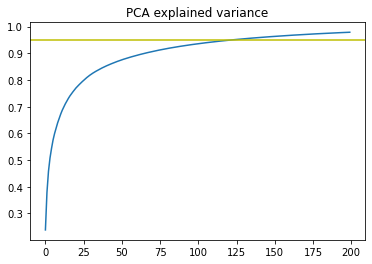

In [24]:
import matplotlib.pyplot as plt
pca=PCA()
pca.fit(faces)
explained_variance_ratio=pca.explained_variance_ratio_
K=200
plt.plot(np.cumsum(explained_variance_ratio[0:K]))
plt.axhline(y=0.95, color="y")
plt.title("PCA explained variance")
plt.show()

In [26]:
pca=PCA(n_components=125)
pca.fit(faces)
Train=pca.transform(faces)
Inverse=pca.inverse_transform(Train)

Wybieram 125 komponentów ponieważ tłumaczą około 95% wariancji

In [25]:
print(f"Compress ratio: {4096/125:.3f}")

Compress ratio: 32.768


In [56]:
df["images"].shape

(400, 64, 64)

In [61]:
faces.shape

(400, 4096)

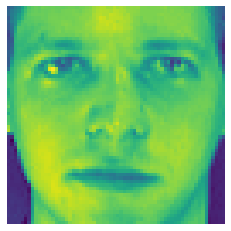

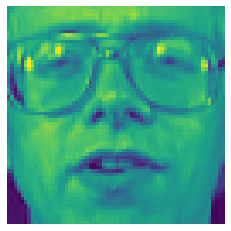

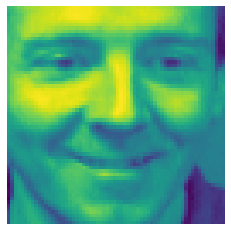

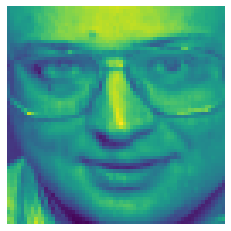

In [60]:
for i in [0,10,20,300]:
    plt.imshow((df["images"])[i])
    plt.axis('off')
    plt.show()

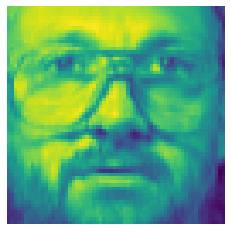

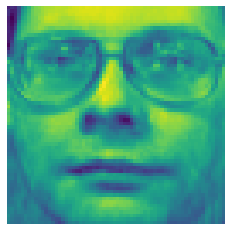

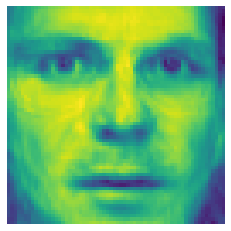

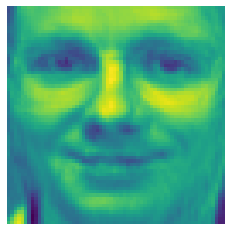

In [51]:
for i in [0,10,20,300]:
    plt.imshow(Inverse[i].reshape(64,64))
    plt.axis('off')
    plt.show()

Po rekonstrukcji osoby mają bardziej wyłupiaste oczy, jakby posiadały okulary. Poniżej obrócony obraz.

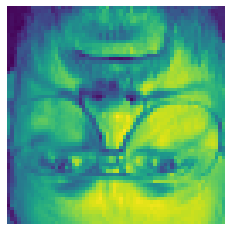

In [52]:
flipped = np.apply_along_axis(np.flip,1,faces)
plt.imshow(flipped[0].reshape(64,64))
plt.axis('off')
plt.show()